In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Memuat Dataset dan enampilkan 5 baris awal
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Menamppilkan informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Analisis Deskriptif
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
# Cek Missing values
print("\nMissing values per ftur: ")
print(df.isnull().sum())


Missing values per ftur: 
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


##EDA

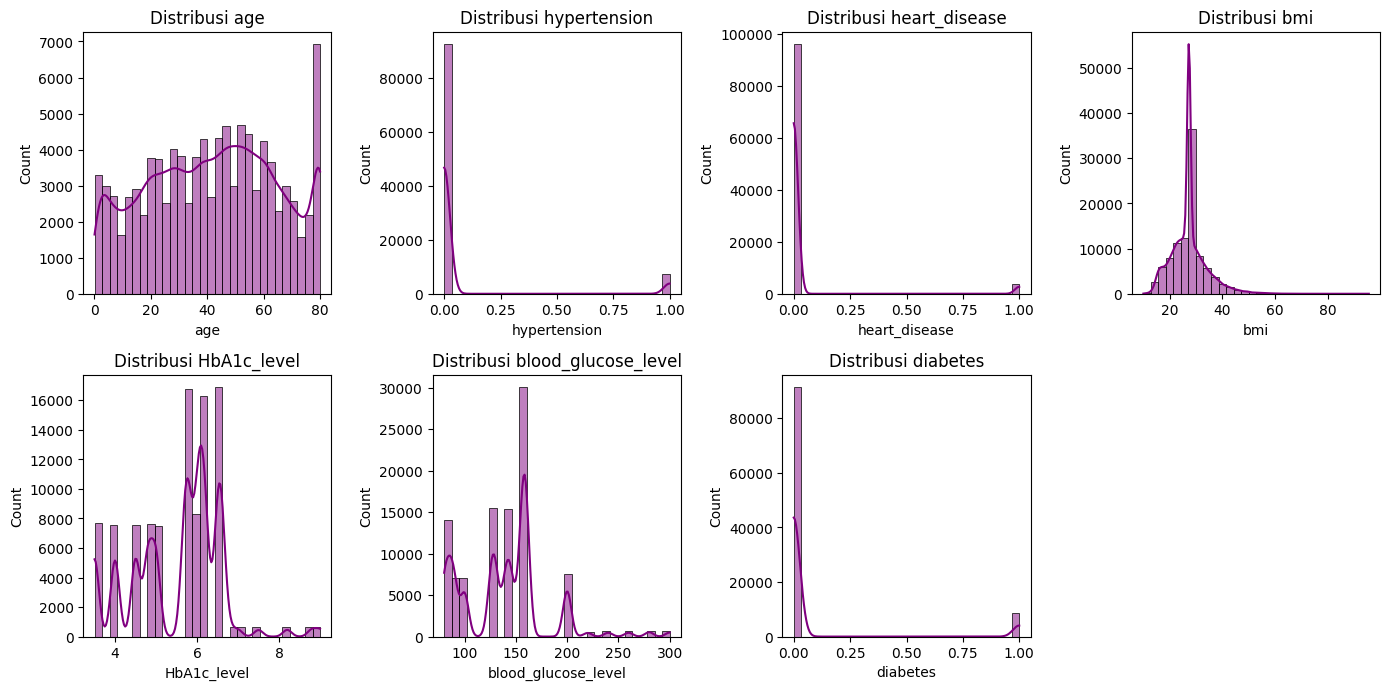

In [7]:
# Ditribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='purple')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

In [8]:
# Check unique values in 'gender'
print("Unique values in 'gender' before filtering:", df['gender'].unique())

# Filter the DataFrame to keep only 'Male' and 'Female' in 'gender'
df = df[df['gender'].isin(['Male', 'Female'])]

# Check unique values in 'gender' after filtering
print("Unique values in 'gender' after filtering:", df['gender'].unique())

Unique values in 'gender' before filtering: ['Female' 'Male' 'Other']
Unique values in 'gender' after filtering: ['Female' 'Male']


In [9]:
# Simplify 'smoking_history' into 'Yes' and 'No'
smoking_map = {
    'never': 'No',
    'No Info': 'No',
    'former': 'No',
    'ever': 'Yes',
    'not current': 'No',
    'current': 'Yes'
}
df['smoking_history'] = df['smoking_history'].map(smoking_map)

# Display the value counts to verify the changes
print(df['smoking_history'].value_counts())

smoking_history
No     86693
Yes    13289
Name: count, dtype: int64


/tmp/ipython-input-10-145008007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')
/tmp/ipython-input-10-145008007.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[column], palette='viridis')


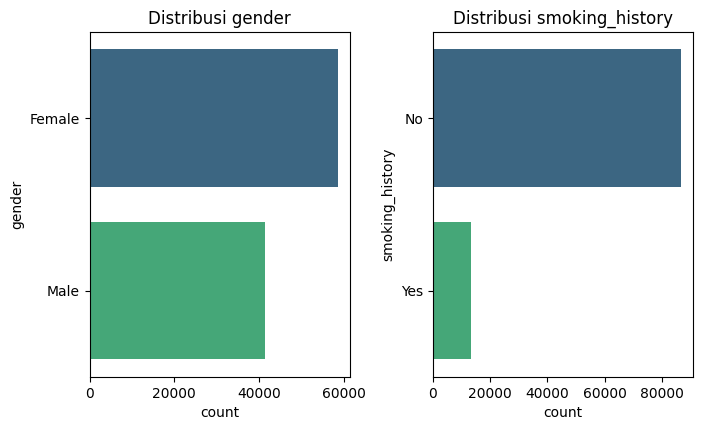

In [10]:
# Distribusi fitur kategorikal
cat_features = df.select_dtypes(include=['object'])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')

plt.tight_layout()
plt.show()

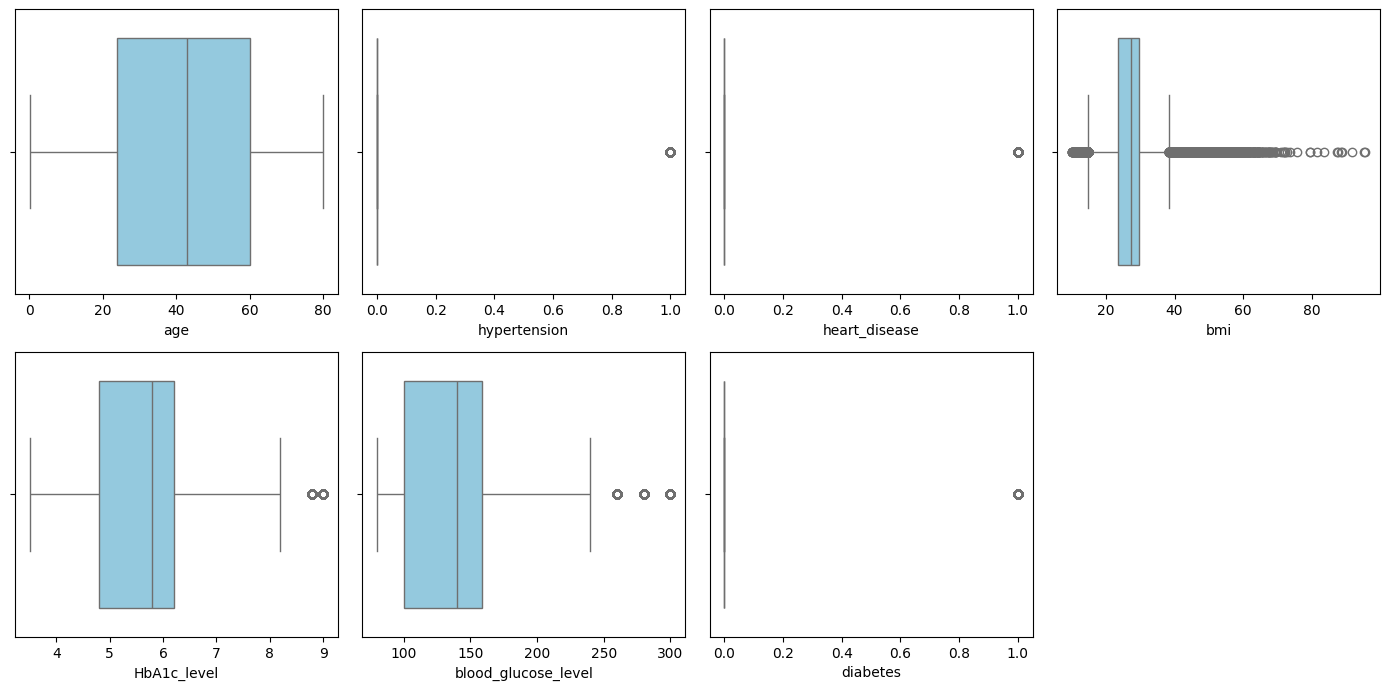

In [11]:
num_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[column], color='skyblue')

plt.tight_layout()
plt.show()

In [11]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,No,25.19,6.6,140,0
1,Female,54.0,0,0,No,27.32,6.6,80,0
2,Male,28.0,0,0,No,27.32,5.7,158,0
3,Female,36.0,0,0,Yes,23.45,5.0,155,0
4,Male,76.0,1,1,Yes,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No,27.32,6.2,90,0
99996,Female,2.0,0,0,No,17.37,6.5,100,0
99997,Male,66.0,0,0,No,27.83,5.7,155,0
99998,Female,24.0,0,0,No,35.42,4.0,100,0


In [12]:
# Calculate the mode of the 'bmi' column
bmi_mode = df['bmi'].median()

# Calculate the IQR for 'bmi'
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the mode
df['bmi'] = np.where(
    (df['bmi'] < lower_bound) | (df['bmi'] > upper_bound),
    bmi_mode,
    df['bmi']
)

print("Outliers in 'bmi' replaced with the mode.")

Outliers in 'bmi' replaced with the mode.


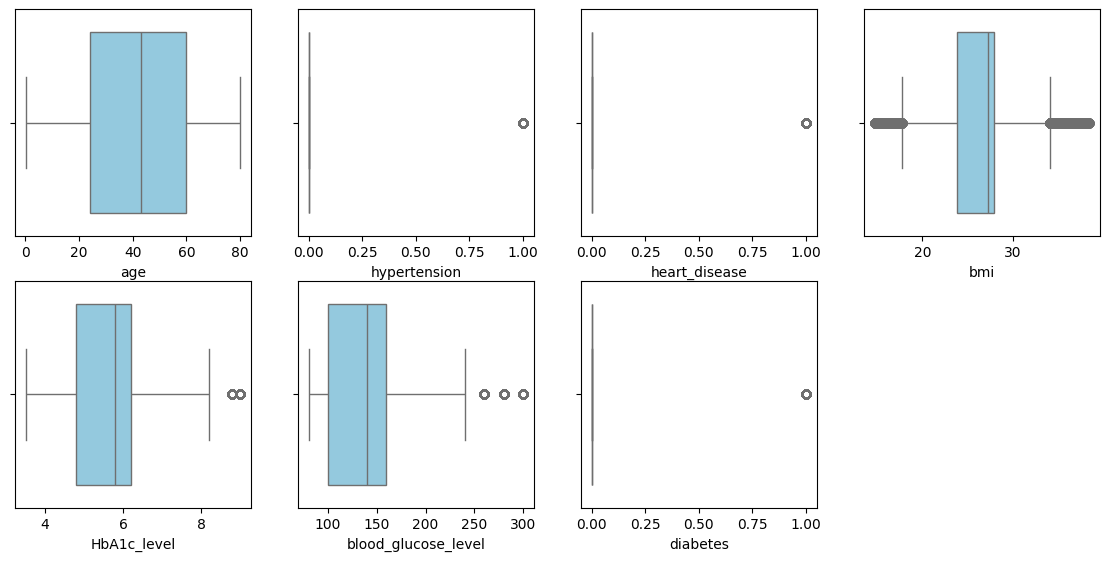

In [13]:
# Cek Outlier pada fitur numerik
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[column], color='skyblue')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  object 
 1   age                  99982 non-null  float64
 2   hypertension         99982 non-null  int64  
 3   heart_disease        99982 non-null  int64  
 4   smoking_history      99982 non-null  object 
 5   bmi                  99982 non-null  float64
 6   HbA1c_level          99982 non-null  float64
 7   blood_glucose_level  99982 non-null  int64  
 8   diabetes             99982 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.6+ MB


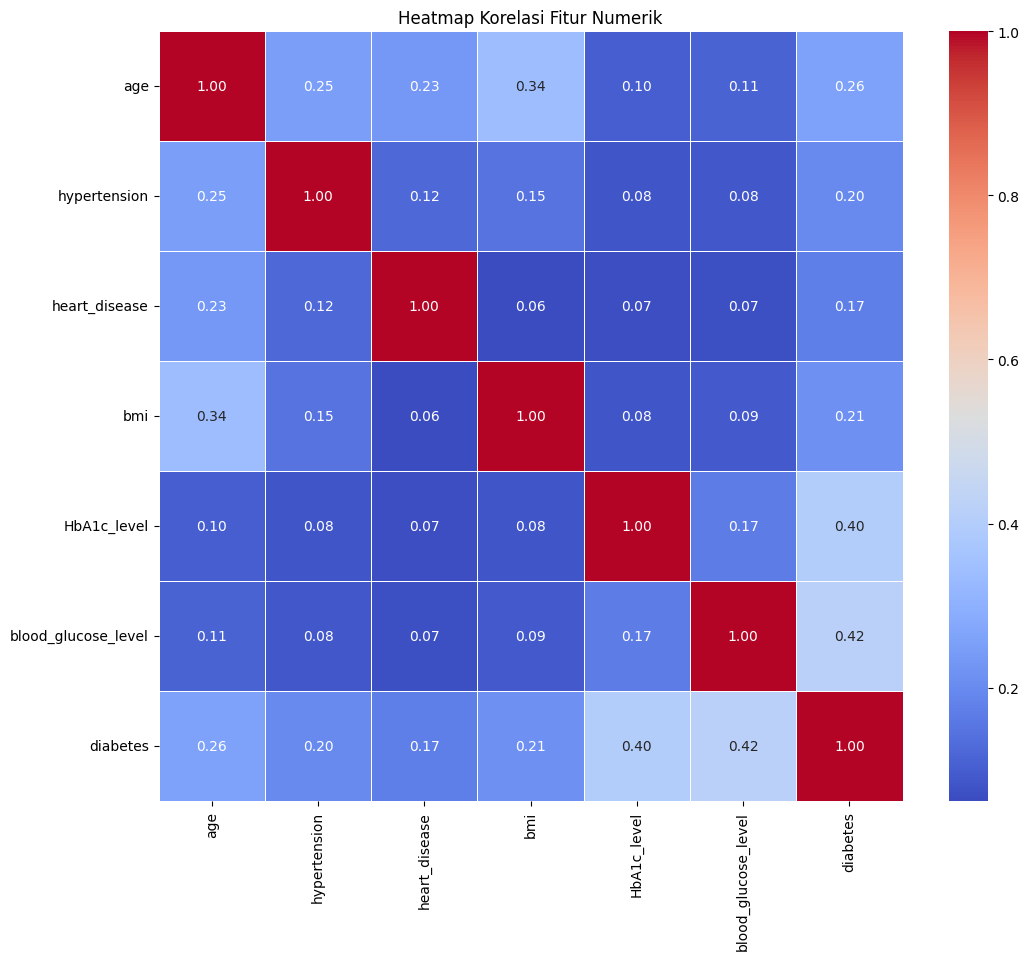

In [14]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

/tmp/ipython-input-15-2245561637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=df, palette='viridis')


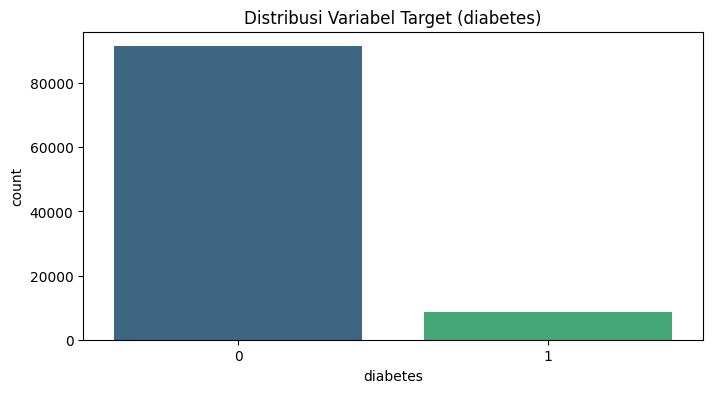

In [15]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='diabetes', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (diabetes)')
plt.show()

## Data Splitting & Standardisasi & Encoder

In [16]:
# Pisah fitur (X) dan target (y)
X = df.drop(columns=['diabetes'])
y = df['diabetes']

from sklearn.preprocessing import LabelEncoder
# Buat instance LabelEncoder
encoder = LabelEncoder()

# List kolom kategorikal yang perlu di encode
categorical_columns = ['gender', 'smoking_history']

# Encode kolom kategorikal
for column in categorical_columns:
    X[column] = encoder.fit_transform(X[column])

from sklearn.preprocessing import StandardScaler
# Buat instance Standardisasi

# Split data menjadi set pelatihan dan set uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.preprocessing import RobustScaler
# Buat instance Standardisasi
scaler = RobustScaler()
# Fit dan transform data training
X_train_scaled = scaler.fit_transform(X_train)

# Transform data testing menggunakan parameter yang sama (fit dari training data)
X_test_scaled = scaler.transform(X_test)


In [17]:
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
48062,1,14.0,0,0,0,27.32,4.8,200
38243,1,3.0,0,0,0,19.99,6.1,130
3806,1,51.0,0,0,0,27.32,7.0,130
63147,0,28.0,0,0,0,27.32,6.1,200
6006,1,10.0,0,0,0,17.70,6.6,100
...,...,...,...,...,...,...,...,...
6265,1,49.0,0,0,0,32.98,5.7,80
54896,0,58.0,0,0,0,27.32,6.6,140
76838,1,42.0,0,0,0,27.32,6.6,140
860,0,37.0,0,0,0,24.96,6.2,158


In [18]:
X_train_scaled.shape

(79985, 8)

In [20]:
X_test_scaled.shape

(19997, 8)

In [21]:
y_train.shape

(79985,)

In [22]:
y_test.shape

(19997,)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
# Persiapan semua model tanpa Tuning
knn = KNeighborsClassifier().fit(X_train_scaled, y_train)
nb = GaussianNB().fit(X_train_scaled, y_train)
svm = SVC().fit(X_train_scaled, y_train)
dt = DecisionTreeClassifier().fit(X_train_scaled, y_train)
rf = RandomForestClassifier().fit(X_train_scaled, y_train)
mlp = MLPClassifier().fit(X_train_scaled, y_train)
sgd = SGDClassifier().fit(X_train_scaled, y_train)
abc = AdaBoostClassifier().fit(X_train_scaled, y_train)
gbc = GradientBoostingClassifier().fit(X_train_scaled, y_train)
xgb = XGBClassifier().fit(X_train_scaled, y_train)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='auto', p=2, metric='euclidean').fit(X_train_scaled, y_train)
nb = GaussianNB(priors=None, var_smoothing=1e-9).fit(X_train, y_train)
svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, probability=False, max_iter=-1).fit(X_train_scaled, y_train)
dt = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, max_features=None, splitter='best',random_state=None).fit(X_train_scaled, y_train)
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=None, bootstrap=True).fit(X_train_scaled, y_train)
mlp = MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam', learning_rate='constant').fit(X_train_scaled, y_train)
sgd = SGDClassifier(loss='hinge', max_iter=100, alpha=0.0001, learning_rate='optimal').fit(X_train_scaled, y_train)
abc = AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, algorithm='deprecated', random_state=None).fit(X_train_scaled, y_train)
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None).fit(X_train_scaled, y_train)
xgb = XGBClassifier(n_estimators= 100, learning_rate=0.3, max_depth=6, subsample=1.0).fit(X_train_scaled, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FN)': fn,
        'False Negative (FP)': fp,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilny
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn,X_test_scaled, y_test),
    'Decision Tree': evaluate_model(dt, X_test_scaled, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test_scaled, y_test),
    'Support Vector Machine (SVM)':evaluate_model(svm,X_test_scaled, y_test),
    'Naive Bayes': evaluate_model(nb, X_test, y_test),
    'Multilayer Perceptron (MLP)': evaluate_model(mlp, X_test_scaled, y_test),
    'Stochastic Gradient Descent (SGD)': evaluate_model(sgd, X_test_scaled, y_test),
    'AdaBoost': evaluate_model(abc, X_test_scaled, y_test),
    'Gradient Boosting': evaluate_model(gbc, X_test_scaled, y_test),
    'XGBoost': evaluate_model(xgb, X_test_scaled, y_test)
}

# Buat DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                               Model  Accuracy  Precision    Recall  F1-Score
0          K-Nearest Neighbors (KNN)  0.960944   0.910744  0.620845  0.738358
1                      Decision Tree  0.952443   0.732244  0.731831  0.732037
2                 Random Forest (RF)  0.967945   0.938176  0.683944  0.791137
3       Support Vector Machine (SVM)  0.960694   0.994006  0.560563  0.716859
4                        Naive Bayes  0.109266   0.090621  1.000000  0.166183
5        Multilayer Perceptron (MLP)  0.970546   0.991708  0.673803  0.802415
6  Stochastic Gradient Descent (SGD)  0.958344   0.904639  0.593239  0.716570
7                           AdaBoost  0.970846   1.000000  0.671549  0.803505
8                  Gradient Boosting  0.970996   0.995851  0.676056  0.805369
9                            XGBoost  0.970196   0.975787  0.681127  0.802256


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 25.7 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
# Membuat fungsi objective untuk Optuna
def objective(trial):
    # Hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 200)  # Number of trees
    learning_rate = trial.suggest_float('learning_rate', 0.1,10.0)  # Learning rate
    max_depth = trial.suggest_int('max_depth', 3, 10)  # Maximum depth of each tree

    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=42,
)

    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    return score.mean()

In [ ]:
import optuna

# Optuna study untuk GBC
study_gbc = optuna.create_study(direction='maximize')
study_gbc.optimize(objective, n_trials=200, timeout=3600)

print("[GBC] Best parameter: ", study_gbc.best_params)
print("[GBC] Best value: ", study_gbc.best_value)

[I 2025-06-19 04:16:47,692] A new study created in memory with name: no-name-fc3a9dda-6df3-40af-957b-dcc90203cdf9
[I 2025-06-19 04:17:07,061] Trial 0 finished with value: 0.6232793648809152 and parameters: {'n_estimators': 67, 'learning_rate': 8.416410143916238, 'max_depth': 6}. Best is trial 0 with value: 0.6232793648809152.
[I 2025-06-19 04:17:29,517] Trial 1 finished with value: 0.5880727636431832 and parameters: {'n_estimators': 107, 'learning_rate': 3.033622686401621, 'max_depth': 3}. Best is trial 0 with value: 0.6232793648809152.
[I 2025-06-19 04:17:53,744] Trial 2 finished with value: 0.8332562355441645 and parameters: {'n_estimators': 58, 'learning_rate': 6.507346612372325, 'max_depth': 8}. Best is trial 2 with value: 0.8332562355441645.
[I 2025-06-19 04:18:13,969] Trial 3 finished with value: 0.5038944802150402 and parameters: {'n_estimators': 66, 'learning_rate': 4.6573166606432626, 'max_depth': 4}. Best is trial 2 with value: 0.8332562355441645.
[I 2025-06-19 04:19:00,290] 

[GBC] Best parameter:  {'n_estimators': 156, 'learning_rate': 0.11836414531033324, 'max_depth': 3}
[GBC] Best value:  0.9720697630805775


In [ ]:
# Gunakan Best parameter dari GBC
best_param_gbc = {'n_estimators': 156, 'learning_rate': 0.11836414531033324, 'max_depth': 3}

# Membuat model GBC dengan best parameter OPTUNA
gbc_model = GradientBoostingClassifier(
    n_estimators=best_param_gbc['n_estimators'],
    learning_rate=best_param_gbc['learning_rate'],
    max_depth=best_param_gbc['max_depth'],
    random_state=42
)

# Melatih model pada data pelatihan
gbc_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data pelatihan dan uji
y_pred_train = gbc_model.predict(X_train_scaled)
y_pred_test = gbc_model.predict(X_test_scaled)

# Evaluasi akurasi model
accuracy_train_gbc = accuracy_score(y_train, y_pred_train)
accuracy_test_gbc = accuracy_score(y_test, y_pred_test)

# Menampilkan hasil akurasi
print("GBC - Accuracy train: ",accuracy_train_gbc )
print("GBC - Accuracy test: ",accuracy_test_gbc )

GBC - Accuracy train:  0.9725573545039695
GBC - Accuracy test:  0.9706455968395259


In [23]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 3.4 MB/s eta 0:00:00


In [24]:
# Implementasi model Stacking
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Mendefinisikan base models
base_learners = [
    ('svc', SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, probability=False, max_iter=-1, random_state=42)),
    ('abc', AdaBoostClassifier(estimator=None, n_estimators=50, learning_rate=1.0, algorithm='deprecated', random_state=42)),
    ('xgb', XGBClassifier(n_estimators= 100, learning_rate=0.3, max_depth=6, subsample=1.0)),
    ('rf', RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42, bootstrap=True)),
    ('mlp', MLPClassifier(hidden_layer_sizes=100, activation='relu', solver='adam', learning_rate='constant', max_iter=500, random_state=42))
]

# Mendefinisikan meta-model
meta_model = GradientBoostingClassifier(random_state=42)

# Mendefinisikan StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_learners, final_estimator=meta_model
)

# Melatih Stacking model
stacking_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data pelatihan dan uji
y_pred_train = stacking_model.predict(X_train_scaled)
y_pred_test = stacking_model.predict(X_test_scaled)

# Evaluasi akurasi model
accuracy_train_stacking = accuracy_score(y_train, y_pred_train)
accuracy_test_stacking = accuracy_score(y_test, y_pred_test)

# Menampilkan hasil akurasi
print("Stacking - Accuracy train: ",accuracy_train_stacking )
print("Stacking - Accuracy test: ",accuracy_test_stacking )

Stacking - Accuracy train:  0.9722072888666625
Stacking - Accuracy test:  0.9707956193429015


In [26]:
# Membuat fungsi untuk menampilkan Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}', fontsize=8)
    plt.ylabel('Actual', fontsize=8)
    plt.xlabel('Predicted', fontsize=8)
    plt.show()

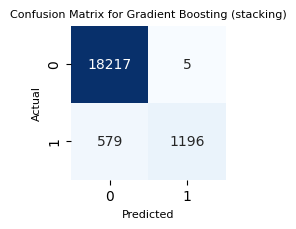

In [27]:

# Calculate the confusion matrix for the GBC model with best parameters
stacking_model = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plot_confusion_matrix(stacking_model, 'Gradient Boosting (stacking)')

- True Positive (TP) = 18298: Model berhasil mengidentifikasi 18292 pasien yang benar-benar Diabetes.

- False Positive (FP) = 557: Model salah mengidentifikasi 557 pasien yang sebenarnya tidak Diabetes sebagai Diabetes.

- True Negative (TN) = 1151: Model benar mengidentifikasi pasien yang tidak Diabetes.

- False Negative (FN) = 0: Model gagal mengidentifikasi 0 pasien yang sebenarnya Diabetes.

In [ ]:
import pickle

# Save the Gradient Boosting model tuned with Optuna to a pickle file
with open('GradientBoostingOptuna.pkl', 'wb') as f:
    pickle.dump(gbc_model, f)

print("Gradient Boosting model tuned with Optuna saved to GradientBoostingOptuna.pkl")

Gradient Boosting model tuned with Optuna saved to GradientBoostingOptuna.pkl


In [ ]:
import pickle
import numpy as np

# Load the saved model
with open('GradientBoostingOptuna.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully.")

# Example prediction
# Create some sample data (ensure it has the same features as your training data)
# This is just an example, replace with your actual new data
sample_data = np.array([[1, 80, 0, 1, 0, 26.0, 6.6, 140]]) # Example data matching the feature order

# Scale the sample data using the same scaler fitted during training
# Make sure the scaler object is available in your environment (it was created in cell wuwk11cbvClt)
sample_data_scaled = scaler.transform(sample_data)

# Make prediction
prediction = loaded_model.predict(sample_data_scaled)

# Display the prediction as "diabetes" or "tidak diabetes"
if prediction[0] == 1:
    print("Prediction for sample data: diabetes")
else:
    print("Prediction for sample data: tidak diabetes")

# You can also get prediction probabilities
# prediction_proba = loaded_model.predict_proba(sample_data_scaled)
# print(f"Prediction probabilities for sample data: {prediction_proba[0]}")

Model loaded successfully.
Prediction for sample data: tidak diabetes


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
